In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [3]:
# Class names for the 10 categories
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


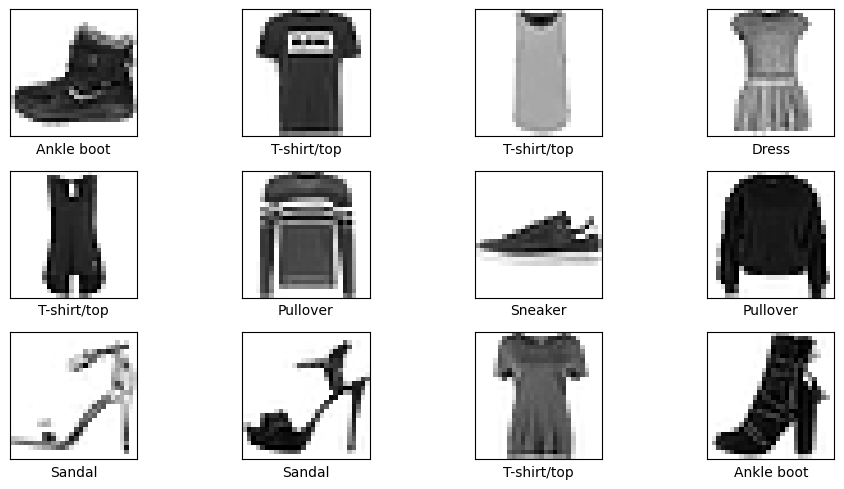

In [4]:
# Display some sample images with labels
plt.figure(figsize=(10, 5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)  # Reshape and display grayscale image
    plt.xlabel(class_names[train_labels[i]])  # Display the corresponding label
plt.tight_layout()
plt.show()

In [5]:
# Data preprocessing
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0


In [6]:
# Reshape data for the model (flatten 28x28 images to 784 vectors)
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))


In [7]:
# Build the model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # First hidden layer
    keras.layers.Dense(64, activation='relu'),                       # Second hidden layer
    keras.layers.Dense(10, activation='softmax')                     # Output layer
])


C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [9]:
# Train the model
history = model.fit(train_images, train_labels, epochs=30, 
                    validation_data=(test_images, test_labels))


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7820 - loss: 0.6189 - val_accuracy: 0.8547 - val_loss: 0.4103
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8636 - loss: 0.3760 - val_accuracy: 0.8603 - val_loss: 0.3758
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8788 - loss: 0.3282 - val_accuracy: 0.8667 - val_loss: 0.3633
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8852 - loss: 0.3121 - val_accuracy: 0.8667 - val_loss: 0.3618
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8880 - loss: 0.2962 - val_accuracy: 0.8810 - val_loss: 0.3403
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8983 - loss: 0.2753 - val_accuracy: 0.8779 - val_loss: 0.3384
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9027 - loss: 0.2645 - val_accuracy: 0.8707 - val_loss: 0.3485
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9050 - loss: 0.2520 -

In [29]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 0s - 1ms/step - accuracy: 0.8878 - loss: 0.4418

Test accuracy: 0.8877999782562256


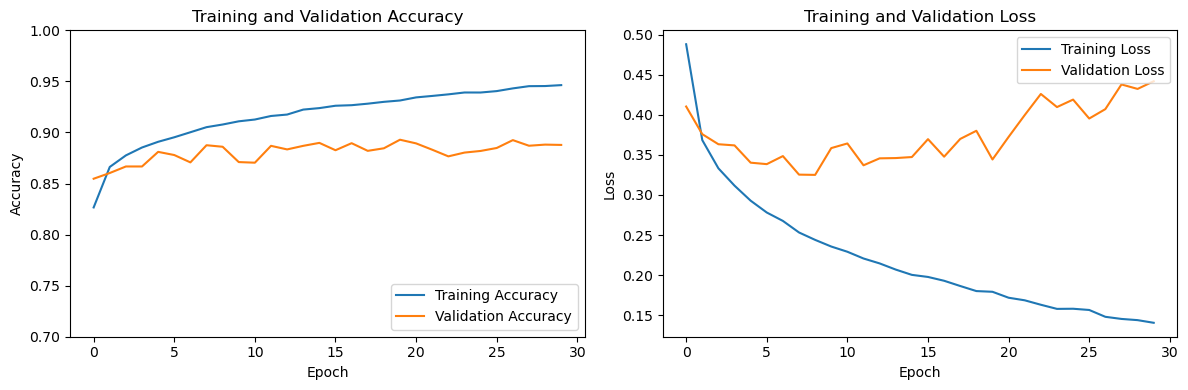

In [11]:
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.7, 1])
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    
    plt.tight_layout()
    plt.show()

plot_history(history)


In [12]:
# Make predictions on a single test image
def predict_single_image(model, images, labels, index=0):
    img = images[index]
    true_label = labels[index]
    
    # Add batch dimension (keras expects batches)
    img = (np.expand_dims(img, 0))
    
    predictions = model.predict(img)
    predicted_label = np.argmax(predictions)
    
    plt.figure()
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f'Actual: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}')
    plt.axis('off')
    plt.show()
    
    return predicted_label


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


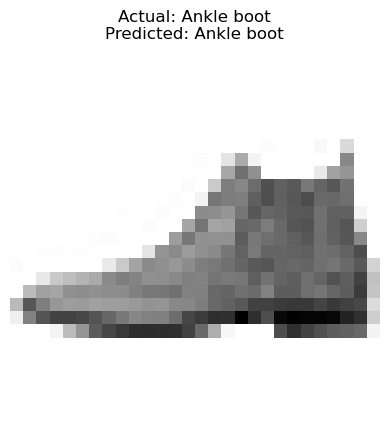

9

In [13]:
# Predict on the first test image
predict_single_image(model, test_images, test_labels, 0)

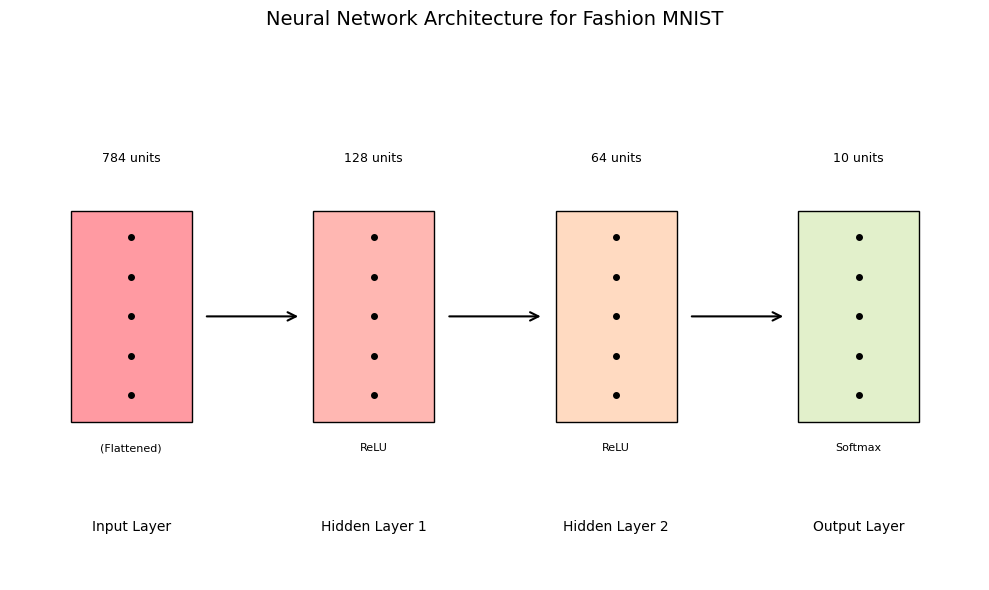

In [27]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, FancyArrowPatch

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.axis('off')

# Title
plt.title("Neural Network Architecture for Fashion MNIST", pad=20, fontsize=14)

# Layer names and units
layers = [
    {"name": "Input Layer", "units": 784, "color": "#FF9AA2"},
    {"name": "Hidden Layer 1", "units": 128, "color": "#FFB7B2"},
    {"name": "Hidden Layer 2", "units": 64, "color": "#FFDAC1"},
    {"name": "Output Layer", "units": 10, "color": "#E2F0CB"}
]

# Draw layers
x_pos = 0
for i, layer in enumerate(layers):
    # Layer box
    ax.add_patch(Rectangle((x_pos, 0.3), 1, 0.4, 
                          facecolor=layer["color"], 
                          edgecolor="black", lw=1))
    
    # Layer label
    plt.text(x_pos + 0.5, 0.1, layer["name"], 
             ha='center', va='center', fontsize=10)
    
    # Unit count
    plt.text(x_pos + 0.5, 0.8, f"{layer['units']} units", 
             ha='center', va='center', fontsize=9)
    
    # Neurons (simplified as dots)
    for y in np.linspace(0.35, 0.65, 5):  # 5 representative neurons
        plt.plot(x_pos + 0.5, y, 'ko', markersize=4)
    
    x_pos += 2

# Arrows between layers
for i in range(len(layers)-1):
    ax.add_patch(FancyArrowPatch(
        (i*2 + 1.1, 0.5), ((i+1)*2 - 0.1, 0.5),
        arrowstyle="->", mutation_scale=15, lw=1.5
    ))

# Activation labels
activations = ["(Flattened)", "ReLU", "ReLU", "Softmax"]
for i, act in enumerate(activations):
    plt.text(i*2 + 0.5, 0.25, act, ha='center', va='center', fontsize=8)

plt.xlim(-0.5, x_pos - 0.5)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("model_architecture.png", dpi=200)
plt.show()